In [1]:
import cv2
 
class ShapeDetector:
    def __init__(self):
        pass
    
    def detect(self, c):
        # initialize the shape name and approximate the contour
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        
        # if the shape is a triangle, it will have 3 vertices
        if len(approx) == 3:
            shape = "Triangle"
        
        # if the shape has 4 vertices, it is either a square or
        # a rectangle
        elif len(approx) == 4:
            # compute the bounding box of the contour and use the
            # bounding box to compute the aspect ratio
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
        
            # a square will have an aspect ratio that is approximately
            # equal to one, otherwise, the shape is a rectangle
            shape = "Square" if ar >= 0.95 and ar <= 1.05 else "Retangle"
        
        # if the shape is a pentagon, it will have 5 vertices
        elif len(approx) == 5:
            shape = "Pentagon"
        
        # otherwise, we assume the shape is a circle
        else:
            shape = "Circle"
        
        # return the name of the shape
        return shape

In [2]:
# import the necessary packages
import imutils
import matplotlib.pyplot as plt
import ipywidgets.widgets as widgets
from PIL import ImageFont, ImageDraw, Image
import cv2

# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread('shape.png')
resized = imutils.resize(image, width=600)
ratio = image.shape[0] / float(resized.shape[0])

plt.imshow(image)  

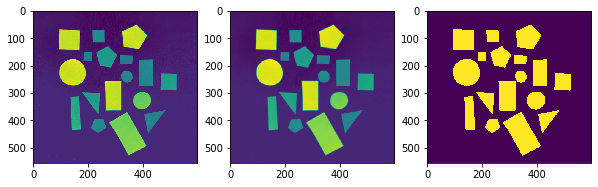

In [3]:
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

images = [gray, blurred, thresh]
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
plt.show()

[cv.putText(img, text, org, fontFace, fontScale, color, thickness, lineType, bottomLeftOrigin)](https://docs.opencv.org/4.1.0/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576)

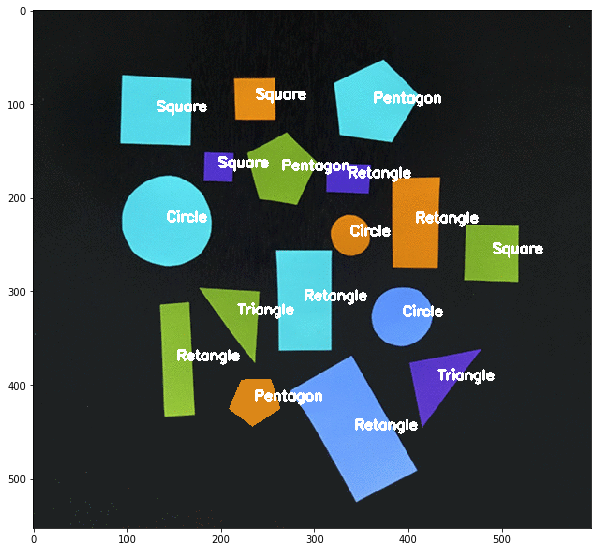

In [4]:
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

# loop over the contours
for c in cnts:
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    shape = sd.detect(c)

    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the image
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

plt.figure(figsize = (10,10))
plt.imshow(image)